In [58]:
import numpy as np
import pandas as pd

# 2. LOAD DATA
df = pd.read_csv("WorkFromHomeBurnout.csv")

df.head()

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,1,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


In [59]:
columns = ['user_id', 'burnout_risk']
for column in columns:
    if column in df.columns:
        df = df.drop(column, axis=1)

print("Data Shape:", df.shape)
display(df.sample(5))

Data Shape: (1800, 9)


,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score
120,Weekday,8.88,12.02,5,4,0,9.76,80.0,22.36
1380,Weekend,5.86,9.21,0,1,1,7.29,85.7,21.77
1183,Weekend,6.65,9.36,2,2,1,7.08,90.4,21.18
988,Weekday,7.21,10.29,4,4,1,5.80,62.3,60.68
836,Weekend,6.25,9.00,0,1,0,7.42,81.4,35.87


In [60]:
df['day_type'].unique().tolist()

['Weekday', 'Weekend']

In [61]:
# 3. PREPROCESSING
# 3.1 Encoding Ordinal Variables (Manual Mapping)
# 'day_type': Weekend -> 0, Weekday -> 1
if df['day_type'].dtype == object:
    df['day_type'] = df['day_type'].map({'Weekend':0, 'Weekday':1})

df.sample(8)

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score
956,1,8.97,12.61,2,3,0,5.46,52.5,74.25
1798,1,8.93,11.11,2,5,0,8.28,74.6,38.14
308,0,3.20,5.56,1,3,0,9.90,54.9,78.59
96,0,3.00,4.52,0,4,1,9.33,67.4,51.02
1127,1,7.93,11.00,4,4,0,7.84,69.2,46.42
1779,0,4.94,8.17,2,4,0,5.73,55.2,77.21
66,1,8.74,10.26,2,5,1,7.05,69.2,40.32
775,1,8.92,11.58,2,5,0,6.58,77.5,39.95


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day_type              1800 non-null   int64  
 1   work_hours            1800 non-null   float64
 2   screen_time_hours     1800 non-null   float64
 3   meetings_count        1800 non-null   int64  
 4   breaks_taken          1800 non-null   int64  
 5   after_hours_work      1800 non-null   int64  
 6   sleep_hours           1800 non-null   float64
 7   task_completion_rate  1800 non-null   float64
 8   burnout_score         1800 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 126.7 KB


In [63]:
df.describe()

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,0.486667,6.515117,9.271406,1.941111,3.028889,0.358889,6.996467,72.308556,44.009978
std,0.499961,2.290521,2.409253,1.696178,1.417844,0.479808,1.061740,14.978647,23.881782
min,0.000000,3.000000,4.510000,0.000000,1.000000,0.000000,4.500000,40.000000,2.500000
25%,0.000000,4.430000,7.240000,1.000000,2.000000,0.000000,6.280000,62.300000,25.370000
50%,0.000000,6.445000,9.210000,2.000000,3.000000,0.000000,6.990000,74.500000,39.270000
75%,1.000000,8.510000,11.310000,3.000000,4.000000,1.000000,7.750000,83.700000,58.197500
max,1.000000,12.170000,15.700000,10.000000,5.000000,1.000000,10.800000,107.200000,143.920000


### Handling Missing Values

In [64]:
null_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

print(null_summary)

                      Missing_Count  Missing_Percentage
day_type                          0                 0.0
work_hours                        0                 0.0
screen_time_hours                 0                 0.0
meetings_count                    0                 0.0
breaks_taken                      0                 0.0
after_hours_work                  0                 0.0
sleep_hours                       0                 0.0
task_completion_rate              0                 0.0
burnout_score                     0                 0.0


In [65]:
missing = df.isna().sum()
print(f"{missing} missing rows found.")


day_type                0
work_hours              0
screen_time_hours       0
meetings_count          0
breaks_taken            0
after_hours_work        0
sleep_hours             0
task_completion_rate    0
burnout_score           0
dtype: int64 missing rows found.


### Handling Duplicated Values

In [66]:
duplicated = df.duplicated().sum()
print(f"{duplicated} duplicated rows found.")

if duplicated > 0:
    df = df.drop_duplicates()
    
print(f"{duplicated} duplicated rows removed.")

print(df.shape)

0 duplicated rows found.
0 duplicated rows removed.
(1800, 9)


In [67]:
df.describe()

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,0.486667,6.515117,9.271406,1.941111,3.028889,0.358889,6.996467,72.308556,44.009978
std,0.499961,2.290521,2.409253,1.696178,1.417844,0.479808,1.061740,14.978647,23.881782
min,0.000000,3.000000,4.510000,0.000000,1.000000,0.000000,4.500000,40.000000,2.500000
25%,0.000000,4.430000,7.240000,1.000000,2.000000,0.000000,6.280000,62.300000,25.370000
50%,0.000000,6.445000,9.210000,2.000000,3.000000,0.000000,6.990000,74.500000,39.270000
75%,1.000000,8.510000,11.310000,3.000000,4.000000,1.000000,7.750000,83.700000,58.197500
max,1.000000,12.170000,15.700000,10.000000,5.000000,1.000000,10.800000,107.200000,143.920000


## all-columns

In [69]:
# Numerical and Categorical Features
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Categorical Columns::")
print(categorical_cols.tolist())
print()
print("Numerical Columns:")
print(numerical_cols.tolist())

Categorical Columns::
[]

Numerical Columns:
['day_type', 'work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken', 'after_hours_work', 'sleep_hours', 'task_completion_rate', 'burnout_score']


### 1. day_type

0: 924
1: 876


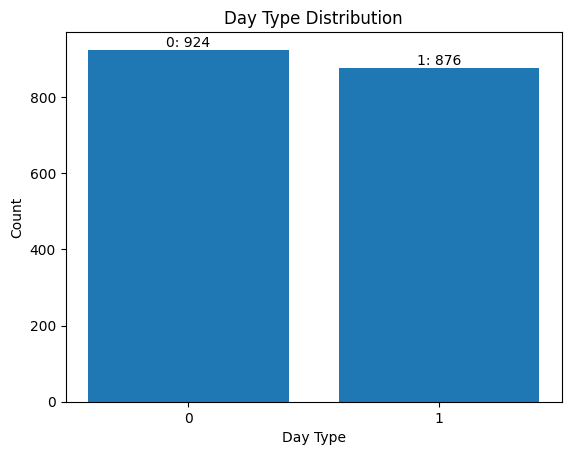

In [70]:
import matplotlib.pyplot as plt

counts = df['day_type'].value_counts()

for day_type, count in counts.items():
    print(f"{day_type}: {count}")

counts = df['day_type'].value_counts().sort_index()

plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.title('Day Type Distribution')

# add labels like "0: 924"
for x, y in zip(counts.index, counts.values):
    plt.text(str(x), y, f"{x}: {y}", ha='center', va='bottom')

plt.show()


          Name: day_type       
     Data Type: int64
Missing Values: 0

count    1800.0
mean     0.4866666666666667
std      0.49996108798001815
min      0.0
25%      0.0
50%      0.0
75%      1.0
max      1.0


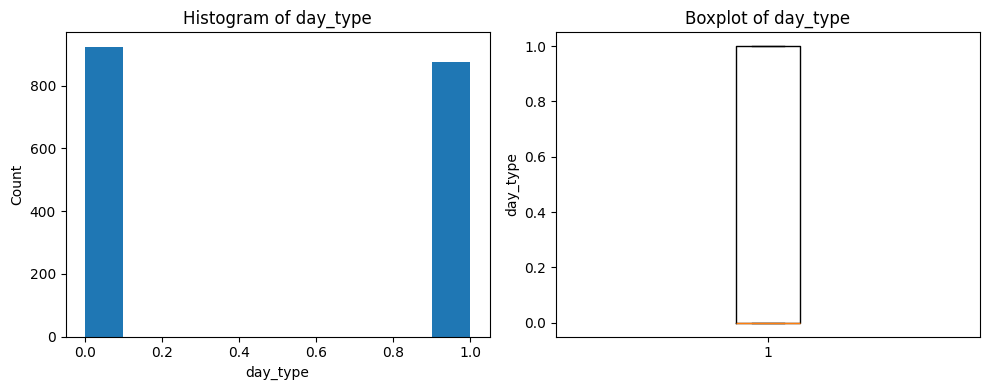

In [71]:
# day_type
field = 'day_type'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 2. work_hours

          Name: work_hours       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     6.515116666666666
std      2.290520933184967
min      3.0
25%      4.43
50%      6.445
75%      8.51
max      12.17


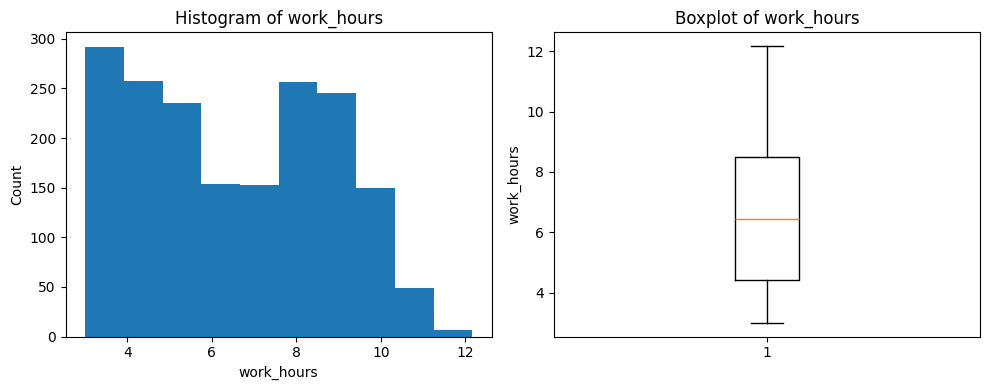

In [72]:
# work_hours
field = 'work_hours'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 3. screen_time_hours

          Name: screen_time_hours       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     9.271405555555555
std      2.4092530013319795
min      4.51
25%      7.24
50%      9.21
75%      11.31
max      15.7


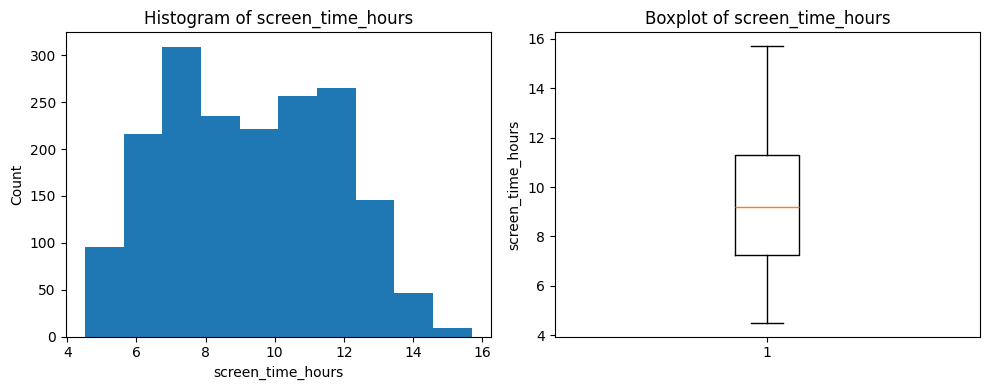

In [73]:
# screen_time_hours
field = 'screen_time_hours'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 4. meetings_count

          Name: meetings_count       
     Data Type: int64
Missing Values: 0

count    1800.0
mean     1.941111111111111
std      1.6961778596973558
min      0.0
25%      1.0
50%      2.0
75%      3.0
max      10.0


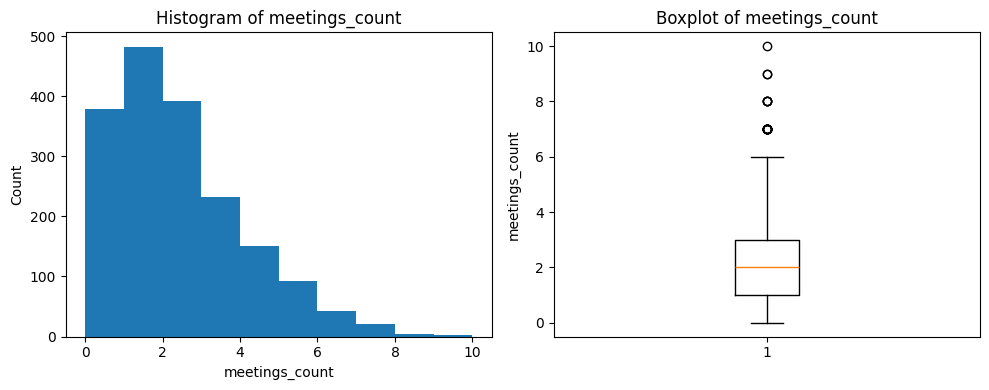

In [74]:
# meetings_count
field = 'meetings_count'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 5. breaks_taken

          Name: breaks_taken       
     Data Type: int64
Missing Values: 0

count    1800.0
mean     3.028888888888889
std      1.4178442282472656
min      1.0
25%      2.0
50%      3.0
75%      4.0
max      5.0


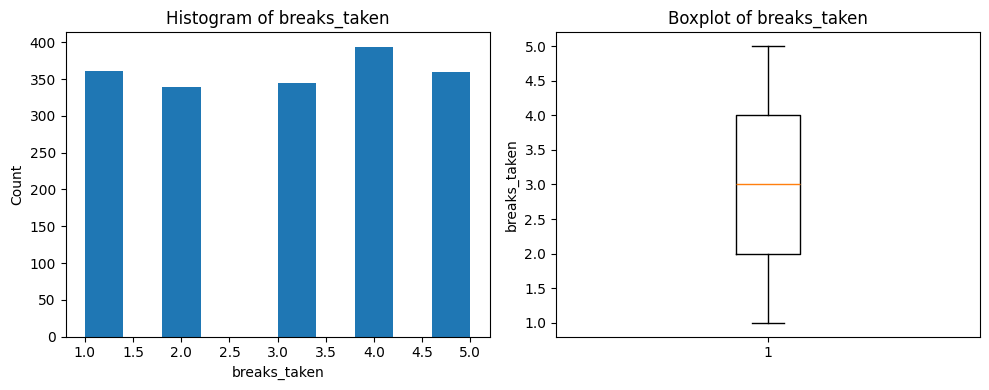

In [75]:
# breaks_taken
field = 'breaks_taken'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 6. after_hours_work

          Name: after_hours_work       
     Data Type: int64
Missing Values: 0

count    1800.0
mean     0.35888888888888887
std      0.47980782804138694
min      0.0
25%      0.0
50%      0.0
75%      1.0
max      1.0


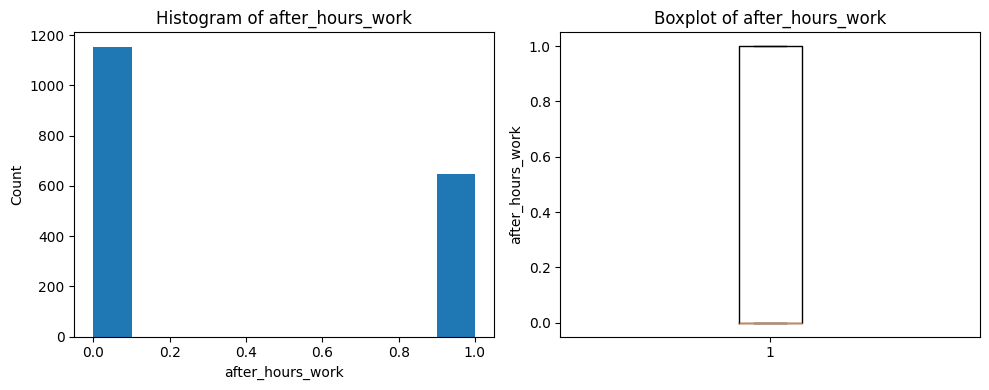

In [76]:
# after_hours_work
field = 'after_hours_work'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 7. sleep_hours

          Name: sleep_hours       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     6.996466666666667
std      1.0617404005473892
min      4.5
25%      6.28
50%      6.99
75%      7.75
max      10.8


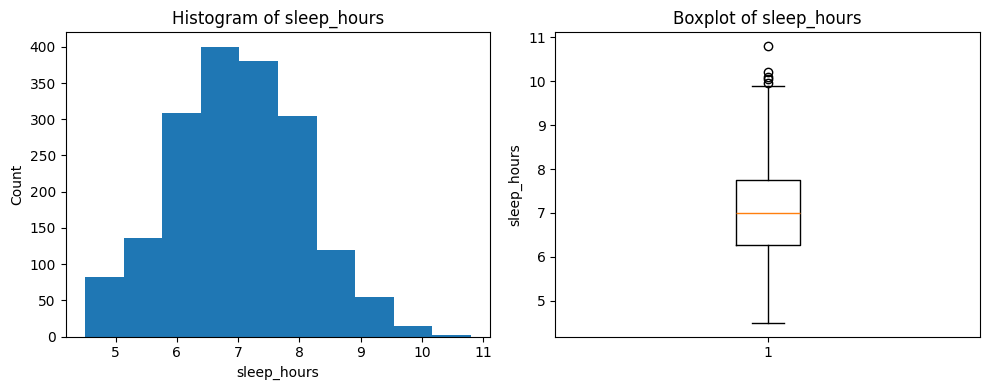

In [77]:
# sleep_hours
field = 'sleep_hours'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 8. task_completion_rate

          Name: task_completion_rate       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     72.30855555555556
std      14.97864680330159
min      40.0
25%      62.3
50%      74.5
75%      83.7
max      107.2


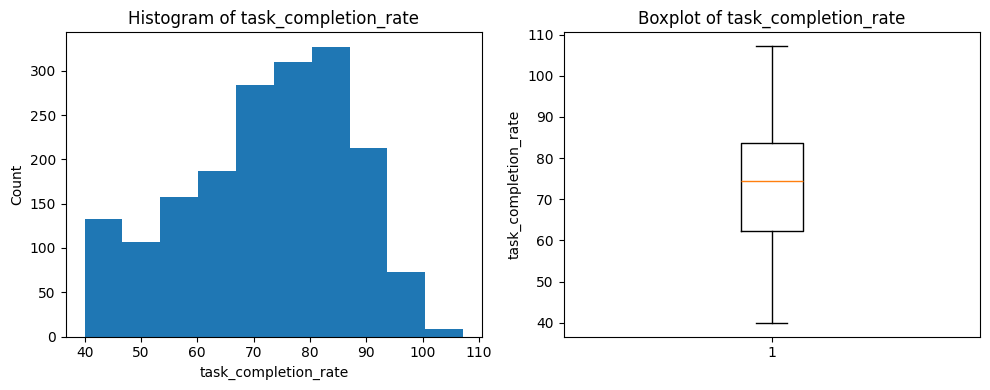

In [78]:
# task_completion_rate
field = 'task_completion_rate'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

In [79]:
# For any rate column where rate > 100 and rate < 0
field = 'task_completion_rate'
df[field] = df[field].clip(0, 100)

          Name: task_completion_rate       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     72.2958888888889
std      14.953315336914104
min      40.0
25%      62.3
50%      74.5
75%      83.7
max      100.0


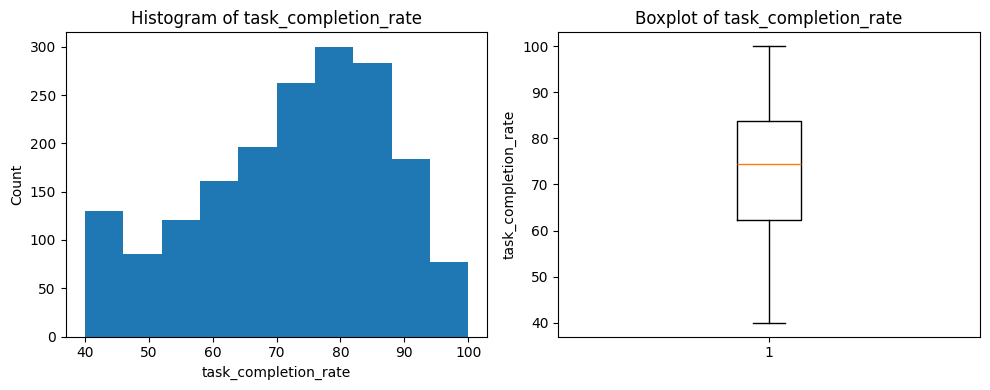

In [81]:
# task_completion_rate
field = 'task_completion_rate'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 9. burnout_score

          Name: burnout_score       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     44.00997777777777
std      23.881782058406365
min      2.5
25%      25.369999999999997
50%      39.269999999999996
75%      58.1975
max      143.92


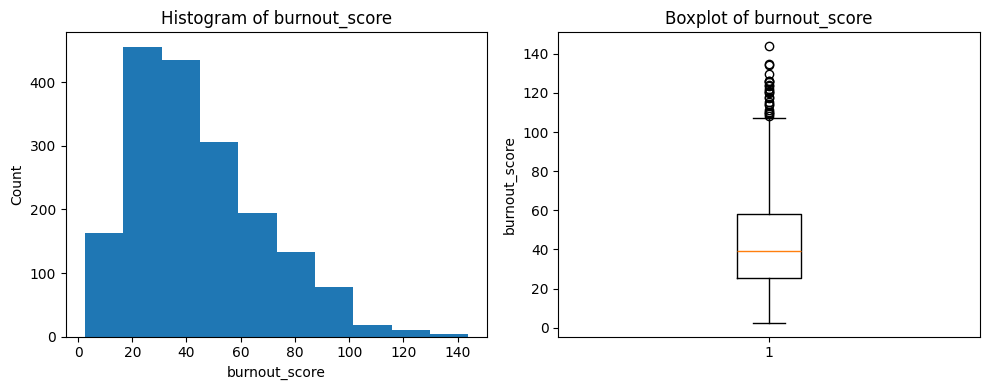

In [82]:
# burnout_score
field = 'burnout_score'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

In [83]:
# For any rate column where rate > 100 and rate < 0
field = 'burnout_score'
df[field] = df[field].clip(0, 100)

          Name: burnout_score       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     43.722572222222226
std      23.052376785944706
min      2.5
25%      25.369999999999997
50%      39.269999999999996
75%      58.1975
max      100.0


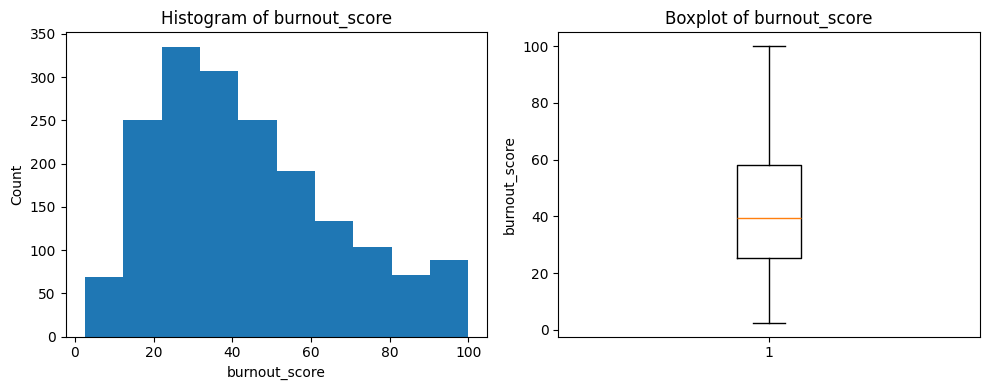

In [84]:
# burnout_score
field = 'burnout_score'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

In [85]:
# Input-Target 
X = df.drop(['burnout_score'], axis=1)
y = df[['burnout_score']]

In [86]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [87]:
X = preprocessor.fit_transform(X)
X.shape

(1800, 8)

In [91]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1440, 8), (360, 8))

In [96]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# def evaluate_model(true, predicted):
#     mae = mean_absolute_error(true, predicted)
#     mse = mean_squared_error(true, predicted)
#     rmse = np.sqrt(mean_squared_error(true, predicted))
#     r2_square = r2_score(true, predicted)
#     return mae, rmse, r2_square

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [98]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [99]:
import warnings
warnings.filterwarnings("ignore")

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

In [100]:
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
results_df

,Model,MAE,RMSE,R2
7,CatBoosting Regressor,4.623235,5.729048,0.939378
0,Linear Regression,4.644444,5.746276,0.939013
2,Ridge,4.645881,5.748152,0.938973
8,AdaBoost Regressor,4.644104,5.749705,0.938940
5,Random Forest Regressor,4.573034,5.781020,0.938273
1,Lasso,4.812882,5.963668,0.934311
6,XGBRegressor,4.934243,6.196352,0.929085
4,Decision Tree,6.099667,7.785134,0.888057
3,K-Neighbors Regressor,6.924872,8.682169,0.860774
